# Vizualizacija Statističkih Veza i Raspodela

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 23.07.2025.

---

### 1. **Što su statistične veze i raspodele?**

Statističke veze i raspodele su ključni koncepti u analizi podataka:

**Statističke veze:**
- **Korelacija** - meri linearnu vezu između varijabli
- **Regresija** - modeluje odnose između varijabli
- **Asocijacije** - otkriva patterns u podacima

**Raspodele podataka:**
- **Distribucija** - kako su vrednosti raspoređene
- **Oblik** - normalna, skewed, multimodalna
- **Centralne tendencije** - mean, median, mode

### **Glavne Seaborn funkcije:**

- **jointplot()** - kombinovane analize parova varijabli
- **pairplot()** - matrica odnosa između svih varijabli
- **regplot()** - regresijske analize
- **displot()** - distribucijske analize

---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Osnovno podešavanje
sns.set_theme()
print("✅ Biblioteke učitane!")
print(f"Seaborn verzija: {sns.__version__}")

# Učitavanje podataka
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')

print(f"Tips dataset: {tips.shape}")
print(f"Iris dataset: {iris.shape}")
print(f"Penguins dataset: {penguins.shape}")

✅ Biblioteke učitane!
Seaborn verzija: 0.13.2
Tips dataset: (244, 7)
Iris dataset: (150, 5)
Penguins dataset: (344, 7)


### 2. Joint Plots - kombinovane analize

**Joint plot** prikazuje odnos između dve varijable + njihove distribucije.

**Tipovi joint plot-ova:**
- **scatter** - osnovni tačkasti dijagram
- **reg** - sa regresijskom linijom
- **kde** - kernel density estimation
- **hex** - hexagonal binning za velike datasets

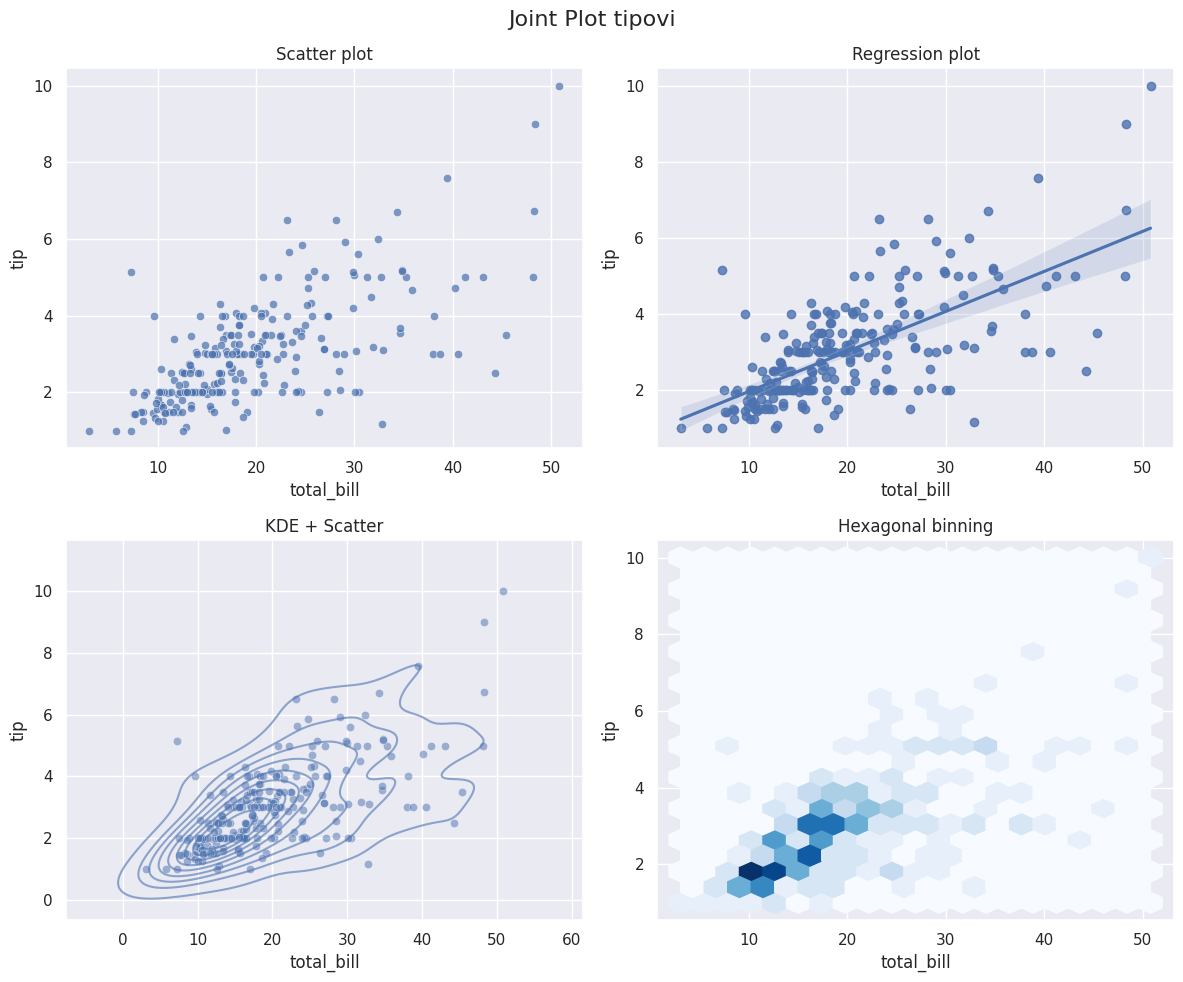


📊 Korelacijska analiza:
Korelacija: 0.676
P-vrednost: 6.69e-34
Interpretacija: Umerena korelacija


In [2]:
# Joint plots - različiti tipovi
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Joint Plot tipovi', fontsize=16)

# 1. Scatter joint plot
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Scatter plot')

# 2. Regression plot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0,1])
axes[0,1].set_title('Regression plot')

# 3. KDE plot sa scatter
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.5, ax=axes[1,0])
sns.kdeplot(data=tips, x='total_bill', y='tip', ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('KDE + Scatter')

# 4. Hexbin za gustinu
axes[1,1].hexbin(tips['total_bill'], tips['tip'], gridsize=20, cmap='Blues')
axes[1,1].set_xlabel('total_bill')
axes[1,1].set_ylabel('tip')
axes[1,1].set_title('Hexagonal binning')

plt.tight_layout()
plt.show()

# Analiza korelacije
correlation, p_value = pearsonr(tips['total_bill'], tips['tip'])
print(f"\n📊 Korelacijska analiza:")
print(f"Korelacija: {correlation:.3f}")
print(f"P-vrednost: {p_value:.2e}")
print(f"Interpretacija: {'Jaka' if abs(correlation) > 0.7 else 'Umerena' if abs(correlation) > 0.3 else 'Slaba'} korelacija")

🎯 SEABORN JOINTPLOT funkcija:


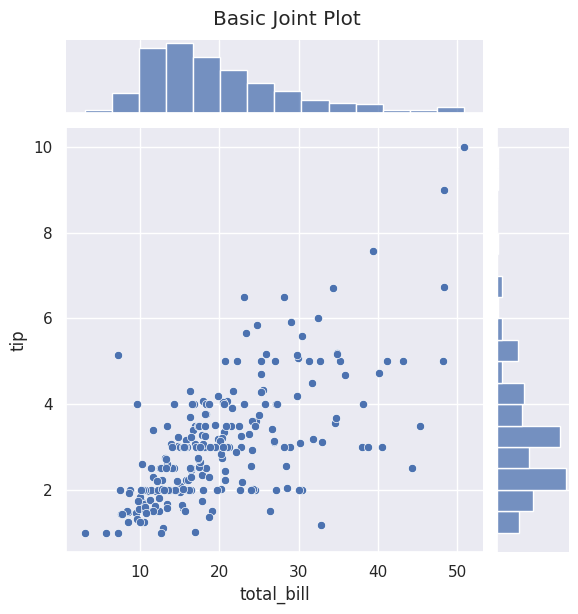

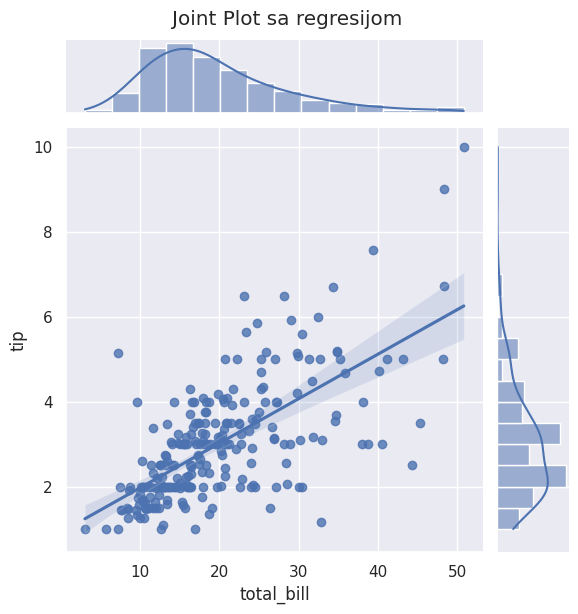

✅ Joint plot prednosti:
• Kombinuje bivariate i univariate analize
• Automatski dodaje marginalne distribucije
• Lako prepoznavanje outliera
• Različiti 'kind' parametri za različite insights


In [3]:
# Seaborn joint plot funkcija - pravi joint plot
print("🎯 SEABORN JOINTPLOT funkcija:")

# 1. Osnovni joint plot
g1 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter', height=6)
g1.fig.suptitle('Basic Joint Plot', y=1.02)
plt.show()

# 2. Joint plot sa regresijom
g2 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', height=6)
g2.fig.suptitle('Joint Plot sa regresijom', y=1.02)
plt.show()

print("✅ Joint plot prednosti:")
print("• Kombinuje bivariate i univariate analize")
print("• Automatski dodaje marginalne distribucije")
print("• Lako prepoznavanje outliera")
print("• Različiti 'kind' parametri za različite insights")

### 3. Pair Plots - matrica odnosa

**Pair plot** kreira matricu scatter plotova za sve parove varijabli.

**Karakteristike:**
- Dijagonala: distribucije pojedinačnih varijabli
- Van dijagonale: scatter plotovi između parova
- Hue parametar: grupisanje po kategorijama

🌸 PAIR PLOT - Iris dataset analiza


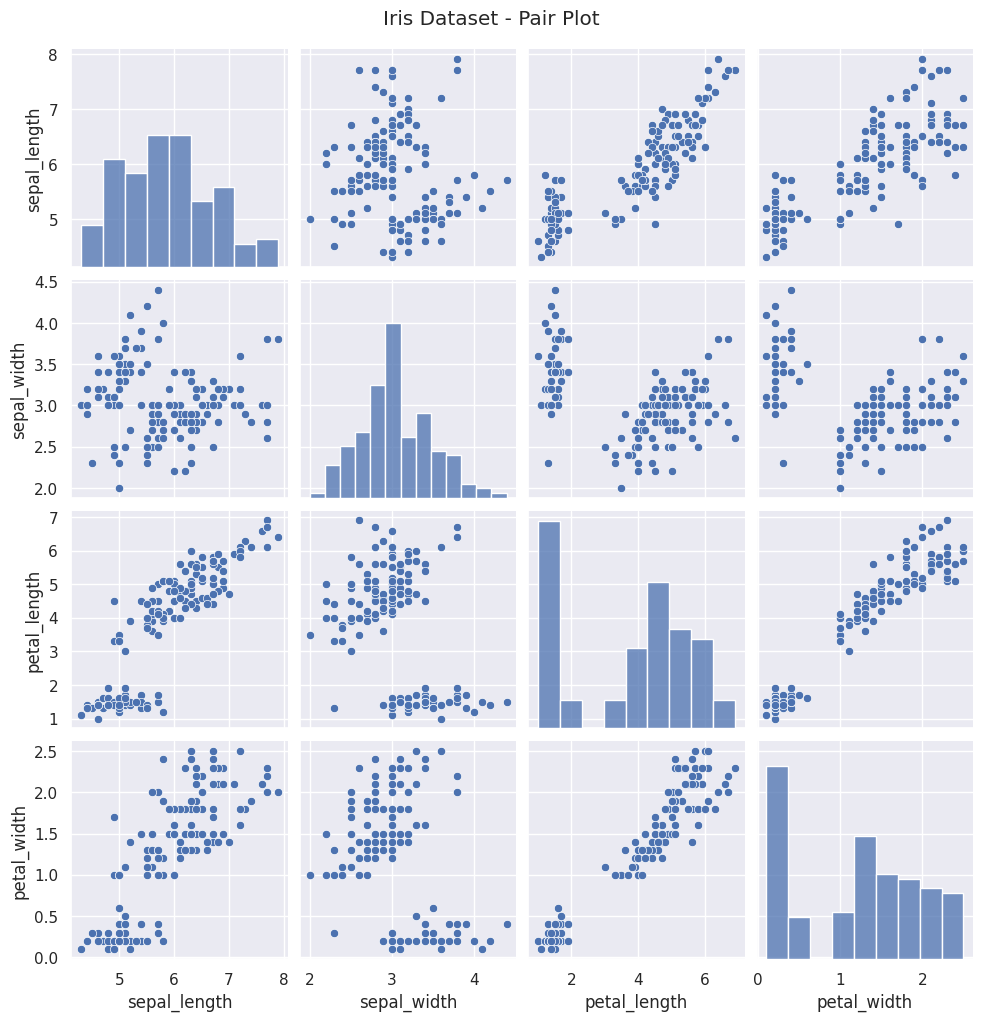

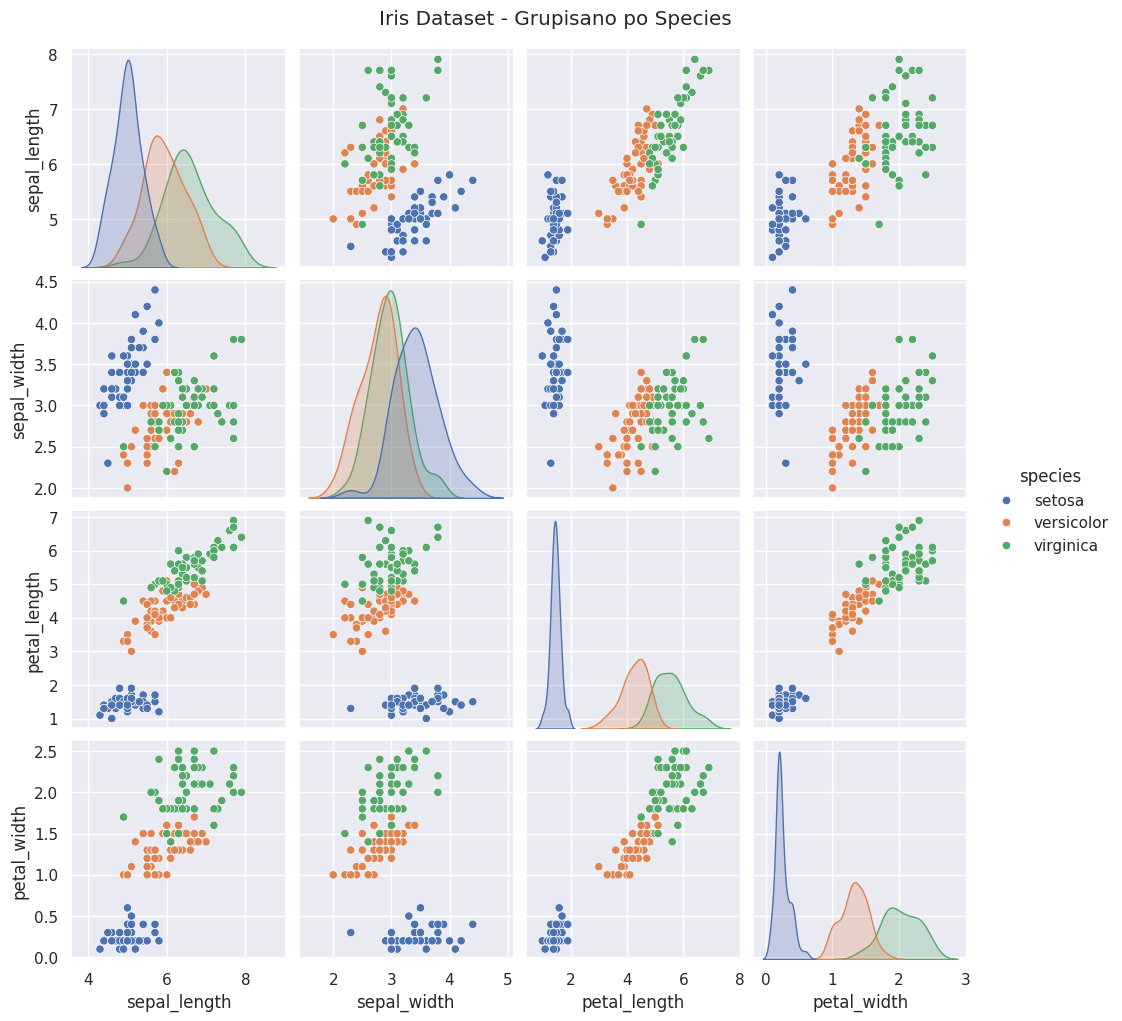

🔍 Što pair plot otkriva:
• petal_length i petal_width su jako korelirani
• setosa vrsta se jasno izdvaja
• versicolor i virginica se delimično preklapaju
• sepal_width ima drugačiju distribuciju


In [4]:
# Pair plot analiza - Iris dataset
print("🌸 PAIR PLOT - Iris dataset analiza")

# Osnovni pair plot
g1 = sns.pairplot(iris)
g1.fig.suptitle('Iris Dataset - Pair Plot', y=1.02)
plt.show()

# Pair plot sa hue grupisanjem
g2 = sns.pairplot(iris, hue='species', height=2.5)
g2.fig.suptitle('Iris Dataset - Grupisano po Species', y=1.02)
plt.show()

print("🔍 Što pair plot otkriva:")
print("• petal_length i petal_width su jako korelirani")
print("• setosa vrsta se jasno izdvaja")
print("• versicolor i virginica se delimično preklapaju")
print("• sepal_width ima drugačiju distribuciju")

📊 NAPREDNI PAIR PLOT opcije:


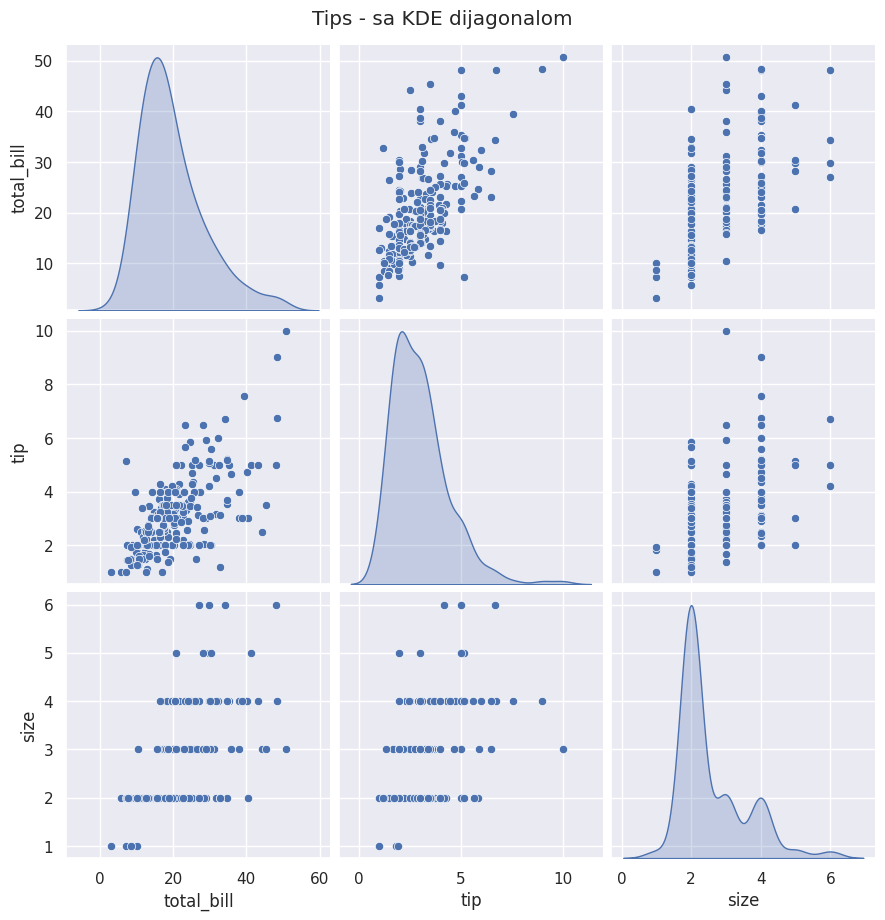

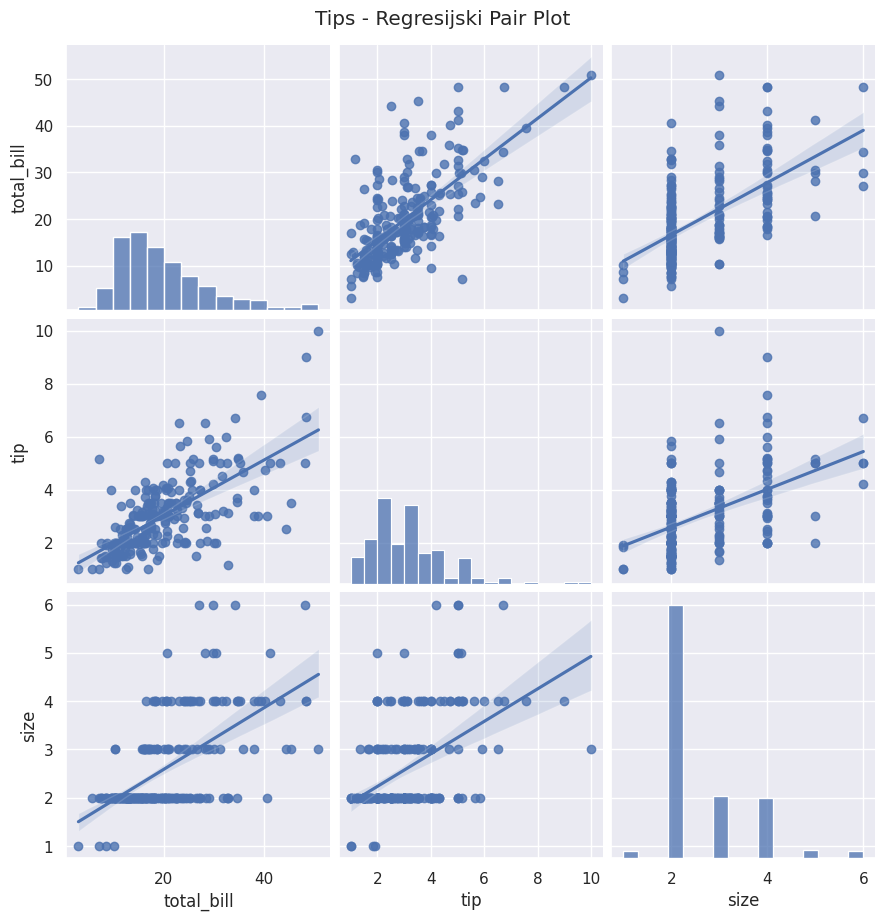

⚙️ Pair plot parametri:
• diag_kind: 'hist', 'kde' - tip dijagonalnih plotova
• kind: 'scatter', 'reg' - tip off-diagonal plotova
• hue: kategorijska varijabla za bojenje
• vars: lista varijabli za uključivanje


In [5]:
# Napredni pair plot sa različitim opcijama
print("📊 NAPREDNI PAIR PLOT opcije:")

# Tips dataset sa različitim plot tipovima
tip_vars = ['total_bill', 'tip', 'size']
tips_subset = tips[tip_vars + ['time']].copy()

# 1. Sa KDE na dijagonali
g1 = sns.pairplot(tips_subset, diag_kind='kde', height=3)
g1.fig.suptitle('Tips - sa KDE dijagonalom', y=1.02)
plt.show()

# 2. Regresijski pair plot
g2 = sns.pairplot(tips_subset, kind='reg', diag_kind='hist', height=3)
g2.fig.suptitle('Tips - Regresijski Pair Plot', y=1.02)
plt.show()

print("⚙️ Pair plot parametri:")
print("• diag_kind: 'hist', 'kde' - tip dijagonalnih plotova")
print("• kind: 'scatter', 'reg' - tip off-diagonal plotova")
print("• hue: kategorijska varijabla za bojenje")
print("• vars: lista varijabli za uključivanje")

### 4. Distribucijske analize

**Distribucija** pokazuje kako su vrednosti raspoređene.

**Tipovi distribucija:**
- **Normalna** - simetrična, zvonasta
- **Skewed** - asimetrična (levo ili desno)
- **Bimodalna** - dva vrha
- **Uniformna** - ravnomerno raspoređene vrednosti

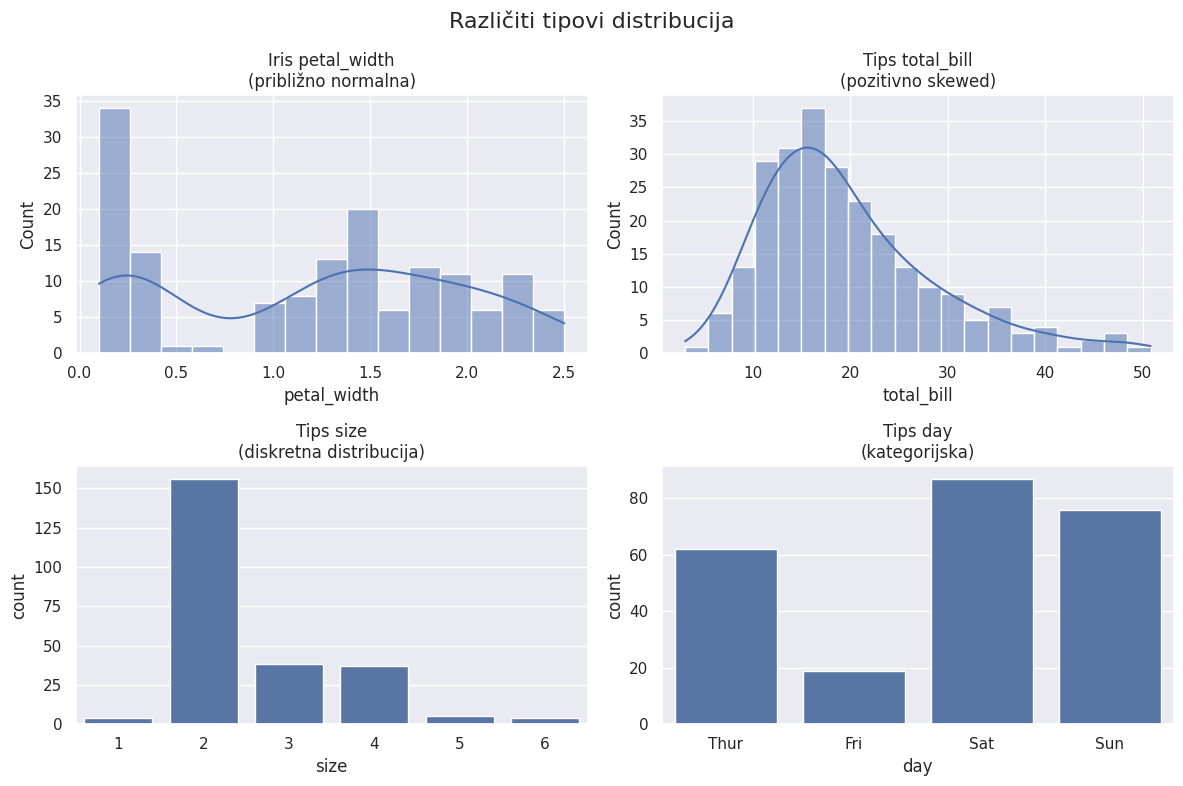

📈 DESKRIPTIVNE STATISTIKE:

Iris petal_width (normalna):
Mean: 1.20
Median: 1.30
Std: 0.76

Tips total_bill (skewed):
Mean: 19.79
Median: 17.80
Skewness: Mean > Median = pozitivno skewed


In [6]:
# Distribucijska analiza
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Različiti tipovi distribucija', fontsize=16)

# 1. Normalna distribucija - petal_width
sns.histplot(iris['petal_width'], bins=15, kde=True, ax=axes[0,0])
axes[0,0].set_title('Iris petal_width\n(približno normalna)')

# 2. Skewed distribucija - total_bill
sns.histplot(tips['total_bill'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title('Tips total_bill\n(pozitivno skewed)')

# 3. Diskretna distribucija - size
sns.countplot(data=tips, x='size', ax=axes[1,0])
axes[1,0].set_title('Tips size\n(diskretna distribucija)')

# 4. Kategorijska distribucija - day
sns.countplot(data=tips, x='day', ax=axes[1,1])
axes[1,1].set_title('Tips day\n(kategorijska)')

plt.tight_layout()
plt.show()

# Deskriptivne statistike
print("📈 DESKRIPTIVNE STATISTIKE:")
print("\nIris petal_width (normalna):")
print(f"Mean: {iris['petal_width'].mean():.2f}")
print(f"Median: {iris['petal_width'].median():.2f}")
print(f"Std: {iris['petal_width'].std():.2f}")

print("\nTips total_bill (skewed):")
print(f"Mean: {tips['total_bill'].mean():.2f}")
print(f"Median: {tips['total_bill'].median():.2f}")
print(f"Skewness: Mean > Median = pozitivno skewed")

📊 SEABORN DISPLOT - napredne distribucije


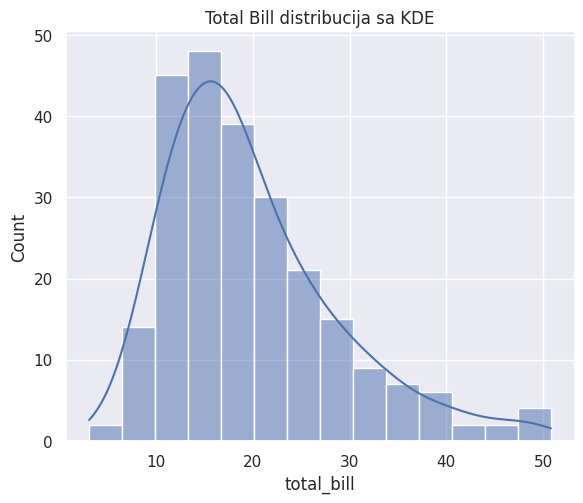

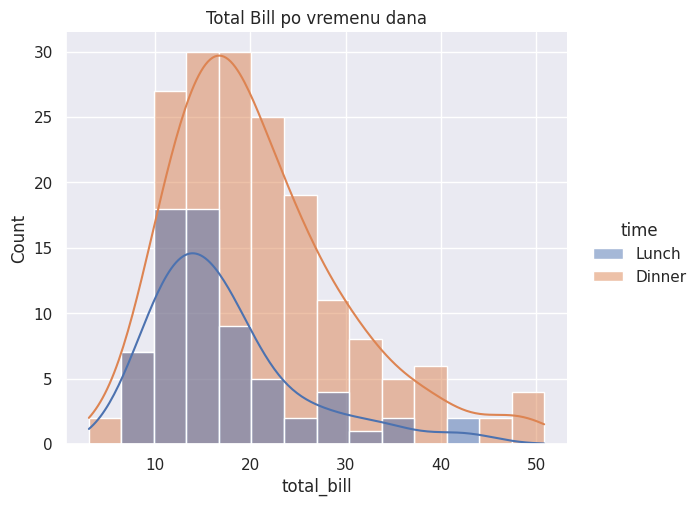

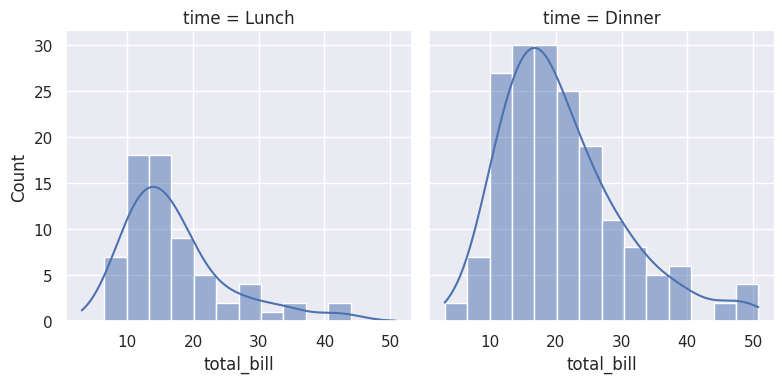

✅ Displot prednosti:
• Kombinuje histogram i KDE
• Hue parametar za grupisanje
• Col/row parametri za faceting
• Automatsko prilagođavanje bin veličina


In [7]:
# Seaborn displot funkcija
print("📊 SEABORN DISPLOT - napredne distribucije")

# 1. Osnovna distribucija
sns.displot(tips, x='total_bill', kde=True, height=5, aspect=1.2)
plt.title('Total Bill distribucija sa KDE')
plt.show()

# 2. Grupisane distribucije
sns.displot(tips, x='total_bill', hue='time', kde=True, height=5, aspect=1.2)
plt.title('Total Bill po vremenu dana')
plt.show()

# 3. Faceted distribucije
sns.displot(tips, x='total_bill', col='time', kde=True, height=4)
plt.show()

print("✅ Displot prednosti:")
print("• Kombinuje histogram i KDE")
print("• Hue parametar za grupisanje")
print("• Col/row parametri za faceting")
print("• Automatsko prilagođavanje bin veličina")

### 5. Regresijska analiza

**Regresija** modeluje odnos između zavisne i nezavisne varijable.

**Seaborn regresijski plotovi:**
- **regplot()** - osnovni regresijski plot
- **lmplot()** - regplot sa FacetGrid mogućnostima
- **residplot()** - plot reziduala za dijagnostiku

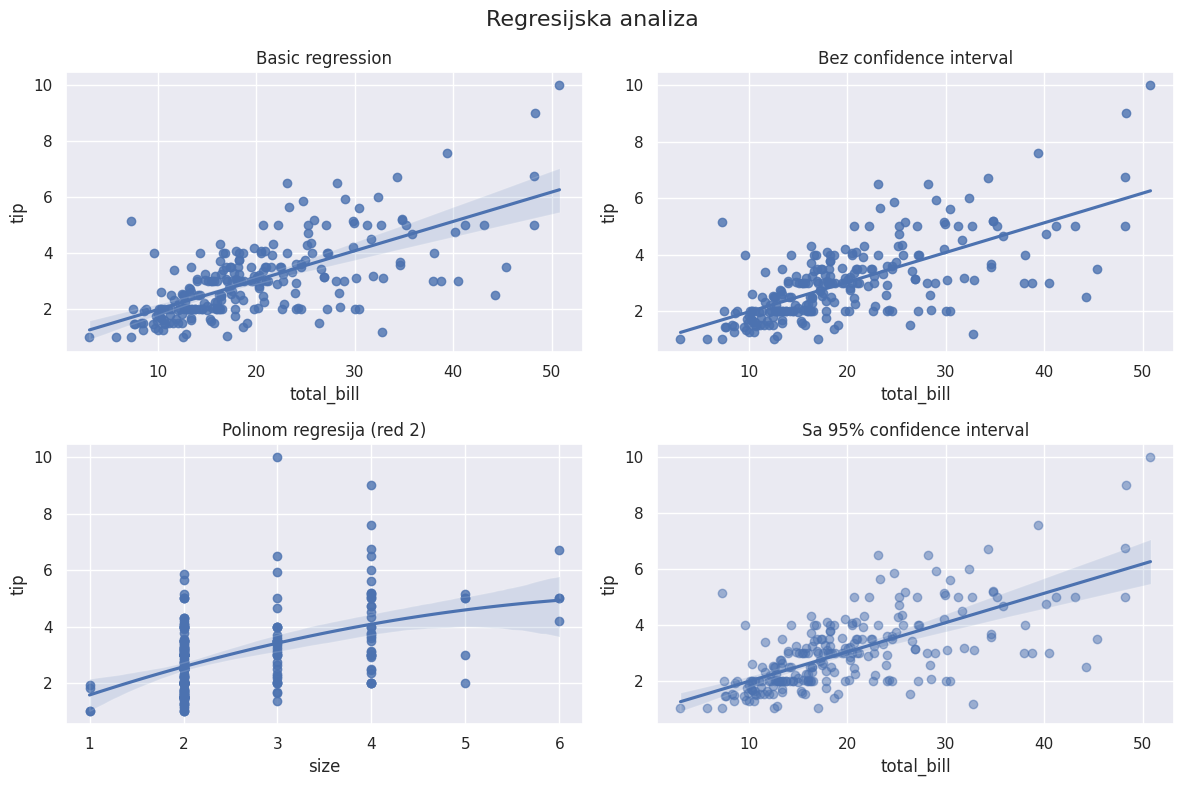

📈 REGRESIJSKE STATISTIKE:
Slope (nagib): 0.105
Intercept: 0.920
R-squared: 0.457
P-vrednost: 6.69e-34

🔍 INTERPRETACIJA:
Za svaki $1 povećanja računa, napojnica raste za $0.11
Model objašnjava 45.7% varijanse u napojnicama


In [8]:
# Regresijska analiza
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Regresijska analiza', fontsize=16)

# 1. Osnovni regplot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Basic regression')

# 2. Regplot bez confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None, ax=axes[0,1])
axes[0,1].set_title('Bez confidence interval')

# 3. Polinom regresija (red 2)
sns.regplot(data=tips, x='size', y='tip', order=2, ax=axes[1,0])
axes[1,0].set_title('Polinom regresija (red 2)')

# 4. Scatter sa različitim parametrima
sns.regplot(data=tips, x='total_bill', y='tip', ci=95, scatter_kws={'alpha':0.5}, ax=axes[1,1])
axes[1,1].set_title('Sa 95% confidence interval')

plt.tight_layout()
plt.show()

# Regresijske statistike
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'], tips['tip'])

print("📈 REGRESIJSKE STATISTIKE:")
print(f"Slope (nagib): {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-vrednost: {p_value:.2e}")

print(f"\n🔍 INTERPRETACIJA:")
print(f"Za svaki $1 povećanja računa, napojnica raste za ${slope:.2f}")
print(f"Model objašnjava {r_value**2*100:.1f}% varijanse u napojnicama")

📊 LMPLOT - figure-level regresija


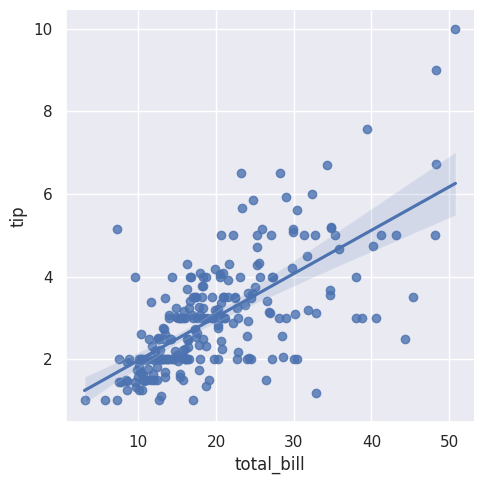

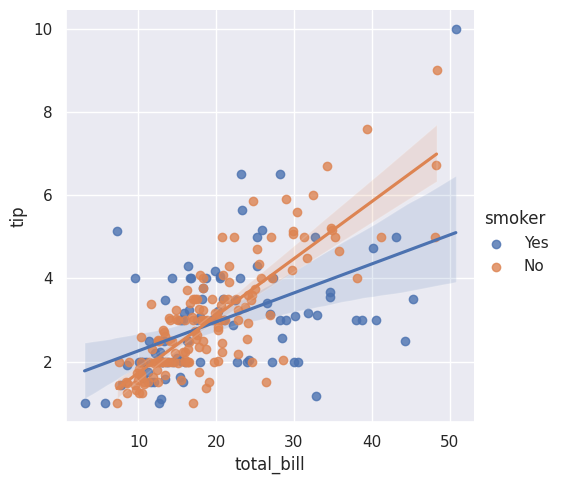

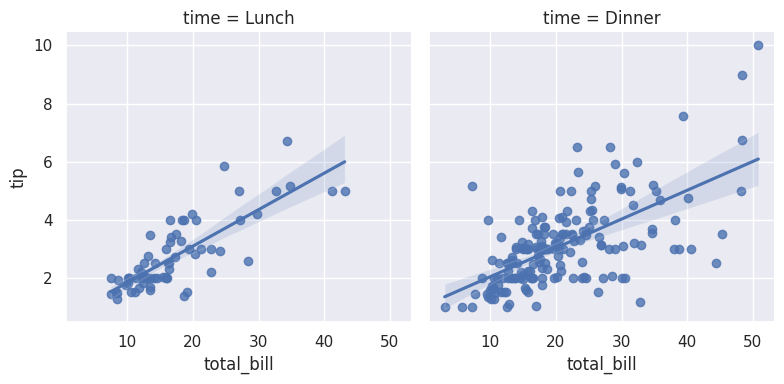

⚙️ lmplot vs regplot:
• lmplot = regplot + FacetGrid
• lmplot može col/row/hue faceting
• regplot radi sa postojećim axes
• lmplot kreira novu figuru


In [9]:
# lmplot - figure-level regresijski plot
print("📊 LMPLOT - figure-level regresija")

# 1. Osnovni lmplot
sns.lmplot(data=tips, x='total_bill', y='tip', height=5)
plt.show()

# 2. lmplot sa hue grupisanjem
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', height=5)
plt.show()

# 3. lmplot sa col faceting
sns.lmplot(data=tips, x='total_bill', y='tip', col='time', height=4)
plt.show()

print("⚙️ lmplot vs regplot:")
print("• lmplot = regplot + FacetGrid")
print("• lmplot može col/row/hue faceting")
print("• regplot radi sa postojećim axes")
print("• lmplot kreira novu figuru")

### 6. Praktični primer - kompletna analiza

Demonstriraćemo kompletnu analizu statističkih veza na penguins datasetu.

🐧 KOMPLETNA ANALIZA - Penguins dataset
Penguins dataset: (333, 7)


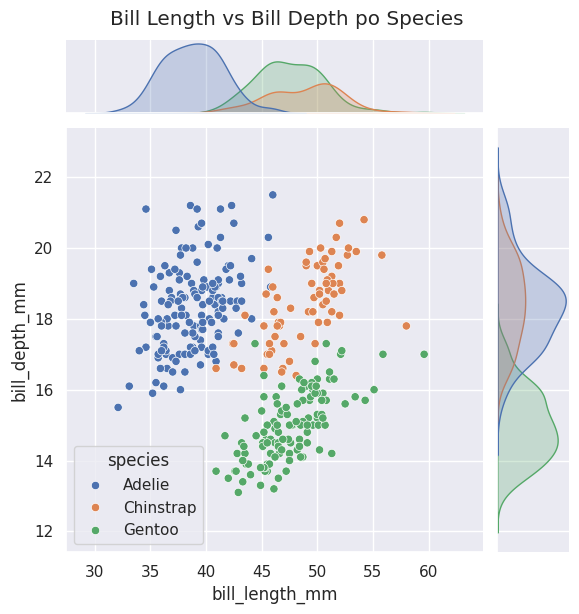

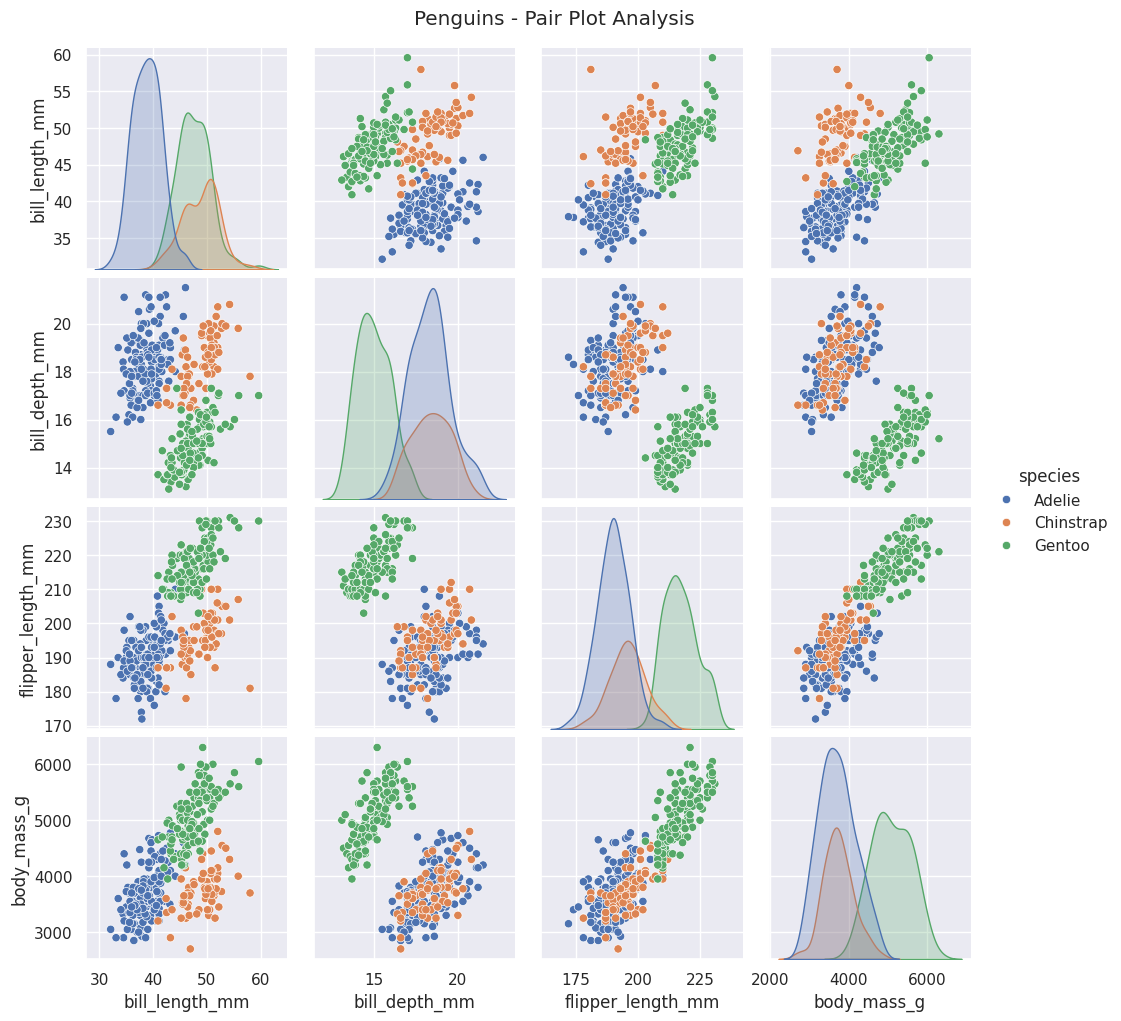

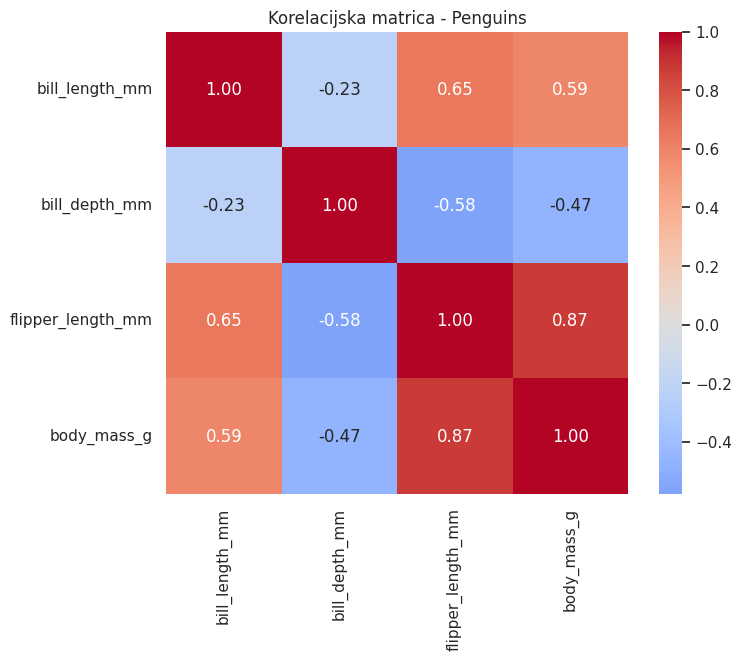

📊 KLJUČNI NALAZI:
• Flipper length i body mass: jaka pozitivna korelacija
• Bill length i flipper length: umerena pozitivna korelacija
• Bill length i depth: slaba negativna korelacija
• Species su jasno razdvojene u pair plot


In [10]:
# Kompletan primer - Penguins dataset
print("🐧 KOMPLETNA ANALIZA - Penguins dataset")

# Uklanjanje missing values
penguins_clean = penguins.dropna()
print(f"Penguins dataset: {penguins_clean.shape}")

# 1. Joint plot analiza
g1 = sns.jointplot(data=penguins_clean, x='bill_length_mm', y='bill_depth_mm', 
                   hue='species', kind='scatter', height=6)
g1.fig.suptitle('Bill Length vs Bill Depth po Species', y=1.02)
plt.show()

# 2. Pair plot svih numeričkih varijabli
numeric_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
g2 = sns.pairplot(penguins_clean[numeric_vars + ['species']], 
                  hue='species', height=2.5)
g2.fig.suptitle('Penguins - Pair Plot Analysis', y=1.02)
plt.show()

# 3. Korelacijska analiza
corr_matrix = penguins_clean[numeric_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Korelacijska matrica - Penguins')
plt.show()

print("📊 KLJUČNI NALAZI:")
print("• Flipper length i body mass: jaka pozitivna korelacija")
print("• Bill length i flipper length: umerena pozitivna korelacija")
print("• Bill length i depth: slaba negativna korelacija")
print("• Species su jasno razdvojene u pair plot")

## 7. Zaključak

U ovom notebook-u smo prošli kroz ključne tehnike za vizualizaciju statističkih veza i raspodela:

### Što smo naučili:
- **Joint plots** za kombinovane analize parova varijabli
- **Pair plots** za brzu analizu svih odnosa u datasetu
- **Distribucijske analize** različitih tipova raspodela
- **Regresijsku analizu** za modelovanje odnosa
- **Praktične interpretacije** statističkih rezultata

### Ključne Seaborn funkcije:
1. **jointplot()** - bivariate + marginal distribucije
2. **pairplot()** - matrica scatter plotova
3. **displot()** - napredne distribucije
4. **regplot()/lmplot()** - regresijska analiza
5. **heatmap()** - korelacijske matrice

### Praktične aplikacije:
- **Exploratory Data Analysis** - početna analiza podataka
- **Feature engineering** - odabir varijabli za modele
- **Data quality check** - pronalaženje outliera
- **Hypothesis testing** - statistička validacija

### Sledeći koraci:
Ove tehnike čine osnovu za naprednije statističke analize i machine learning!

---

**Napomena**: Ovaj notebook pokriva osnove statističkih veza i distribucija u Seaborn-u. Za složenije analize, kombinujte ove tehnike sa dodatnim statističkim testovima.